In [2]:
# Importing the neccessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy import stats 
import matplotlib.pyplot as plt 

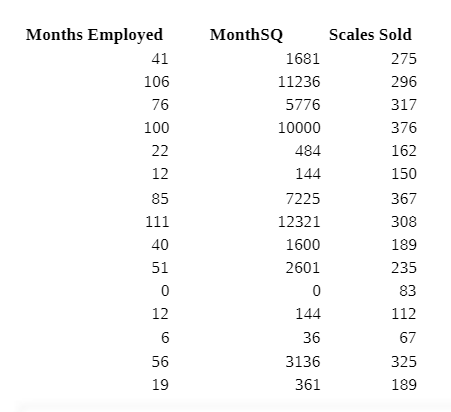

In [8]:
data={'MonthsEmployed':[41,106,76,100,22,12,85,111,40,51,0,12,6,56,19],'ScalesSold':[275,296,317,376,162,150,367,308,189,235,83,112,67,325,189]}

In [9]:
data=pd.DataFrame(data)

In [10]:
data

,MonthsEmployed,ScalesSold
0,41,275
1,106,296
2,76,317
3,100,376
4,22,162
5,12,150
6,85,367
7,111,308
8,40,189
9,51,235


In [11]:
x=data.MonthsEmployed
y=data.ScalesSold

In [12]:
x1=sm.add_constant(x)
mod1=sm.OLS(y,x1)
model=mod1.fit()
model.summary()


C:\Users\abhilash\.conda\envs\dataScience\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     48.95
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.40e-06
Time:                        13:12:24   Log-Likelihood:                -78.431
No. Observations:                  15   AIC:                             160.9
Df Residuals:                      13   BIC:                             162.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            113.7453     20.813      5.465      0.000      68.781     158.710
MonthsEmployed     2.3675      0.338      6.996      0.000       1.636       3.099
==============================================================================
Omnibus:                        0.760   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.634
Skew:                           0.010   Prob(JB):                        0.729
Kurtosis:                       1.993   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

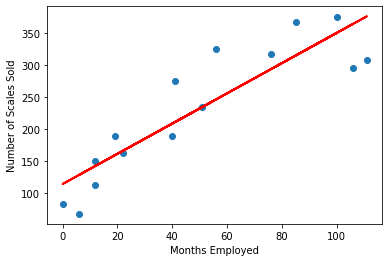

In [15]:
plt.scatter(x,y)
plt.plot(x,[113.7453+2.3675*i for i in x],color='red',lw=2)
plt.xlabel('Months Employed')
plt.ylabel('Number of Scales Sold')
plt.show()

In [16]:
e1=model.resid_pearson
e1

array([ 1.32372758, -1.41668791,  0.48106946,  0.52604438, -0.07897336,
        0.1617861 ,  1.07278552, -1.41333301, -0.40097923,  0.01060133,
       -0.63404279, -0.62186655, -1.25693903,  1.62250641,  0.62430109])

In [17]:
y_hat=model.predict(x1)
y_hat

0     210.811296
1     364.696431
2     293.672523
3     350.491650
4     165.829487
5     142.154851
6     314.979695
7     376.533749
8     208.443832
9     234.485932
10    113.745287
11    142.154851
12    127.950069
13    246.323250
14    158.727096
dtype: float64

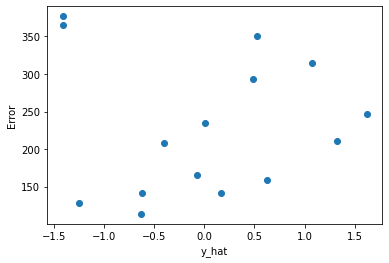

In [20]:
plt.scatter(e1,y_hat)
plt.xlabel('y_hat')
plt.ylabel('Error')
plt.show()

In [21]:
# Using Multiple regression
data['MonthSquared']=x**2
data

,MonthsEmployed,ScalesSold,MonthSquared
0,41,275,1681
1,106,296,11236
2,76,317,5776
3,100,376,10000
4,22,162,484
5,12,150,144
6,85,367,7225
7,111,308,12321
8,40,189,1600
9,51,235,2601


In [22]:
x=data[['MonthsEmployed','MonthSquared']]
y=data.ScalesSold

In [23]:
x2=sm.add_constant(x)
mod2=sm.OLS(y,x2)
model=mod2.fit()
model.summary()

C:\Users\abhilash\.conda\envs\dataScience\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     54.78
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.25e-07
Time:                        13:41:05   Log-Likelihood:                -72.775
No. Observations:                  15   AIC:                             151.5
Df Residuals:                      12   BIC:                             153.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             61.4299     20.574      2.986      0.011      16.602     106.258
MonthsEmployed     5.8198      0.970      6.001      0.000       3.707       7.933
MonthSquared      -0.0310      0.008     -3.676      0.003      -0.049      -0.013
==============================================================================
Omnibus:                        3.137   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                1.225
Skew:                          -0.211   Prob(JB):                        0.542
Kurtosis:                       1.665   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

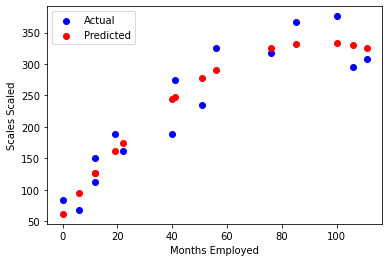

In [25]:
plt.scatter(data.MonthsEmployed,data.ScalesSold,label='Actual',color='blue')
plt.scatter(data.MonthsEmployed,[61.4299+5.8198*i-0.0310*(i**2) for i in data.MonthsEmployed],color='red',label='Predicted')
plt.xlabel('Months Employed')
plt.ylabel('Scales Scaled')
plt.legend()
plt.show()

In [27]:
e2=model.resid_pearson
y_hat=model.predict(x2)
y_hat

0     247.914477
1     329.904633
2     324.623092
3     333.313706
4     174.456820
5     126.802114
6     332.068366
7     325.358212
8     244.606458
9     277.583622
10     61.429935
11    126.802114
12     95.232369
13    290.092475
14    160.811609
dtype: float64

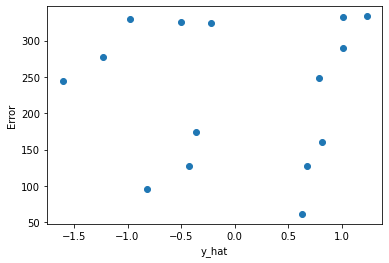

In [29]:
plt.scatter(e2,y_hat)
plt.xlabel('y_hat')
plt.ylabel('Error')
plt.show()

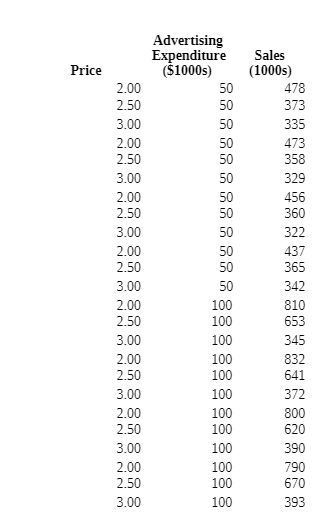

In [56]:
data=pd.read_csv('tyler.csv')
data.head()

,Price,Advertising Expenditure (1000s),Sales (1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


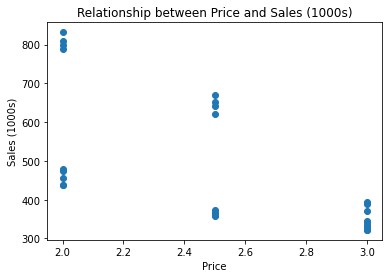

In [57]:
plt.scatter(data['Price'],data['Sales (1000s)'])
plt.xlabel('Price')
plt.ylabel('Sales (1000s)')
plt.title('Relationship between Price and Sales (1000s)')
plt.show()

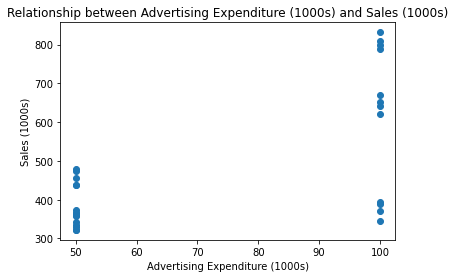

In [58]:
plt.scatter(data['Advertising Expenditure (1000s)'],data['Sales (1000s)'])
plt.xlabel('Advertising Expenditure (1000s)')
plt.ylabel('Sales (1000s)')
plt.title('Relationship between Advertising Expenditure (1000s) and Sales (1000s)')
plt.show()

In [59]:
z1=data['Price']
z2=data['Advertising Expenditure (1000s)']
z3=z1*z2
data['Price X Advertising Expenditure (1000s)']=z3

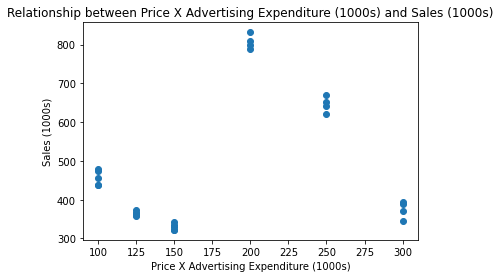

In [60]:
plt.scatter(z3,data['Sales (1000s)'])
plt.xlabel('Price X Advertising Expenditure (1000s)')
plt.ylabel('Sales (1000s)')
plt.title('Relationship between Price X Advertising Expenditure (1000s) and Sales (1000s)')
plt.show()

In [61]:
x=data[['Price','Advertising Expenditure (1000s)','Price X Advertising Expenditure (1000s)']]
y=data['Sales (1000s)']

In [62]:
x

,Price,Advertising Expenditure (1000s),Price X Advertising Expenditure (1000s)
0,2.0,50,100.0
1,2.5,50,125.0
2,3.0,50,150.0
3,2.0,50,100.0
4,2.5,50,125.0
5,3.0,50,150.0
6,2.0,50,100.0
7,2.5,50,125.0
8,3.0,50,150.0
9,2.0,50,100.0


In [63]:
x2=sm.add_constant(x)
mod1=sm.OLS(y,x2)
model=mod1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sales (1000s)   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     353.7
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.23e-19
Time:                        16:30:57   Log-Likelihood:                -124.82
No. Observations:                  27   AIC:                             257.6
Df Residuals:                      23   BIC:                             262.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -294.2333     97.975     -3.003      0.006    -496.910     -91.557
Price                                     180.6000     38.678      4.669      0.000     100.589     260.611
Advertising Expenditure (1000s)            19.8640      1.283     15.485      0.000      17.210      22.518
Price X Advertising Expenditure (1000s)    -6.1360      0.506    -12.117      0.000      -7.184      -5.088
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   2.794
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.748
Skew:                           0.401   Prob(JB):                        0.688
Kurtosis:                       2.848   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
e1=model.resid_pearson
y_hat=model.predict(x2)

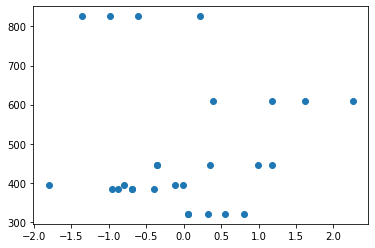

In [65]:
plt.scatter(e1,y_hat)